# Predict Titanic Survival (Model)

**CRISP_DM Methodological Steps:**

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

# 1. Business Understanding


### 1. Business Problem

This project focuses on solving the problem of accurately predicting survival on the Titanic. Misestimations can lead to missed opportunities for understanding factors influencing survival, and better predictions can help in better decision-making for safety improvements. By using predictive analytics, we can gain deeper insights into the factors that determine survival and improve safety measures.



### 2. Business Goal

The main goal of this project is to predict Titanic survival outcomes accurately. By analyzing various features of passengers, we aim to build a model that can reliably predict whether a passenger survived or not. This will help researchers, historians, and safety analysts to understand patterns and improve future safety protocols.


### Introduction

This project involves the Titanic dataset and aims to provide an understanding of how various features of a passenger influence survival chances. The key features in the dataset include:

- **PassengerId**
- **Survived**
- **Pclass**
- **Name**
- **Sex**
- **Age**
- **SibSp**
- **Parch**
- **Ticket**
- **Fare**
- **Cabin**
- **Embarked**



### Summary of Predictive Analytics for Titanic Survival Prediction Project

In this project, machine learning techniques are applied to analyze Titanic passenger data and predict survival. Using algorithms like **Logistic Regression and RandomForestClassifier**, the model learns from historical data and identifies the key features that influence survival. By doing so, we can make early predictions that help historians and researchers understand the factors that influenced survival. This project is significant for enhancing safety protocols and contributing to more informed decisions regarding emergency situations.



### Importing Necessary Libraries

To begin building the model, we need to import various libraries that will help us with data manipulation, visualization, machine learning, and evaluation. These libraries are essential for handling and preparing the dataset, training the model, and evaluating its performance.


In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations, particularly with arrays
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization based on matplotlib
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LogisticRegression  # A classification model used for binary/multi-class classification
from sklearn.ensemble import RandomForestClassifier  # An ensemble learning method for classification tasks
from sklearn.preprocessing import LabelEncoder  # To convert categorical labels into numeric values
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics for classification models
import joblib  # For saving and loading machine learning models

### 2. Data Understanding


#### Loading the Dataset


In [5]:
df=pd.read_csv(r"C:\Users\original\Downloads\Titanic Data.csv")

# Display the first 5 rows of the dataset


In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Get the shape of the dataset (number of rows and columns)


In [9]:
df.shape

(891, 12)

## Display information about the dataframe, including the data types and non-null counts


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Display summary statistics for the numerical columns in the dataframe


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data Preparation

# Check for missing values in each column and display the sum of missing values


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# fillna with median for numeric column
df['Age'] = df['Age'].fillna(df['Age'].median())

# fillna with mode for categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Drop unnecessary columns


In [18]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)

# Check for duplicated rows


In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# Visualize the distribution of Age based on Sex using a boxplot


<Axes: xlabel='Sex', ylabel='Age'>

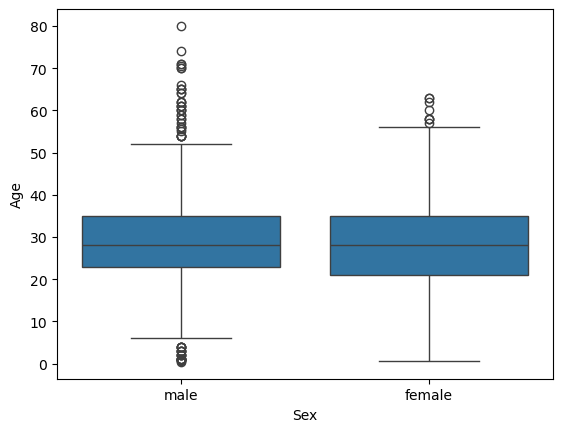

In [24]:
sns.boxplot(x='Sex',y='Age',data=df)

# Drop 'Name' and 'Ticket' columns as they are not relevant to the model


In [26]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

# Apply Label Encoding to 'Sex' and 'Embarked' columns


In [27]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [28]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Splitting Features and Target Variable


In [39]:
x=df.drop('Survived',axis=1)
y=df['Survived']

### Splitting the Data into Training and Testing Sets


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### 4. Modeling
#### Training the Model

In [43]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

#### Making Predictions

In [32]:
y_predict =model.predict(x_test)

### 5. Evaluation
### Evaluating the Model


In [47]:
print(accuracy_score(y_test,y_predict))

0.8100558659217877


###  Saving the Model


In [49]:
joblib.dump(model, r"C:\Users\original\Downloads\Titanic Data.csv")

['C:\\Users\\original\\Downloads\\Titanic Data.csv']

# Confusion Matrix Visualization

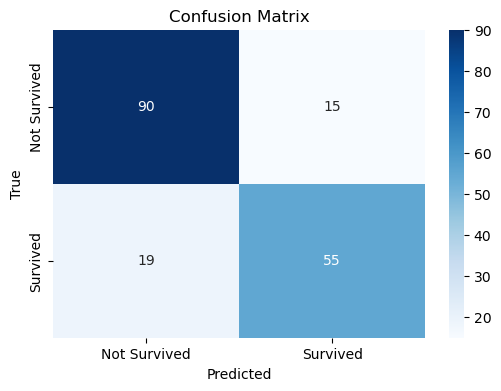

In [58]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training the Model with RandomForestClassifier

In [62]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_predict =model2.predict(x_test)

In [66]:
print(accuracy_score(y_test,y_predict))

0.8044692737430168


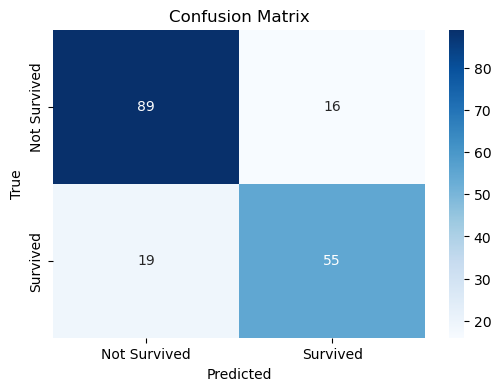

In [68]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()